<a href="https://colab.research.google.com/github/SawantDisha/Google-Collab-Projects/blob/main/Prediction_of_Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Supervised ML

##### To predict the percentage of marks of a student based on the number of study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/IIT Kanpur/ 

/content/drive/My Drive/IIT Kanpur


In [4]:
data = pd.read_csv('Marks.csv')
data.head(10)

,hours,score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


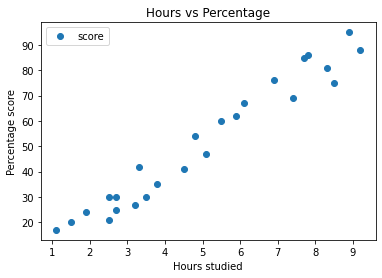

In [5]:
# Plotting the distribution of scores
data.plot(x='hours', y='score', style='o')  # style = '-'
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Preparing the data


In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [7]:
x = data[['hours']].values
y = data[['score']].values

In [8]:
y, x

(array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]]), array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]))

##### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built in train_test_split() method:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Training the Algorithm

##### We have split the data into training and testing sets, and now its finally the time to train our algorithm.

In [10]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Completed!")

Training Completed!


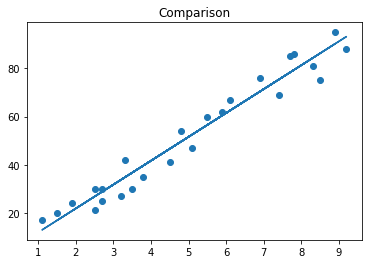

In [11]:
# Plotting the regression line.
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title("Comparison")
plt.show()

# Making Predictions

##### Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted\n",
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]}) 
df 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [14]:
score_pred = np.array([9.25])
score_pred = score_pred.reshape(-1,1)
predict = regressor.predict(score_pred)
print("No of hours={}".format(9.25))
print("Predicted Score={}".format(predict[0]))

No of hours=9.25
Predicted Score=[93.69173249]


# Evaluating the Model

##### The final step is to evaluate the performance of algorithm. This step is particularly important to compare hoe different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean squared error. There are many such metrics.

In [15]:
print('Mean Absolute Error: ',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002982
